In [2]:
import cv2

In [281]:
input=cv2.imread('Before.png')
mustache=cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
glasses=cv2.imread('glasses.png',cv2.IMREAD_UNCHANGED)

In [4]:
cv2.imshow('input',input)
cv2.imshow('mustache',mustache)
cv2.imshow('glasses',glasses)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [282]:
nose=cv2.CascadeClassifier('find_nose.xml')
eyes=cv2.CascadeClassifier('find_eyes.xml')

In [283]:
nose_coor=nose.detectMultiScale(input,1.3,5)
eyes_coor=eyes.detectMultiScale(input,1.3,5)

In [284]:
eyes_nose=cv2.imread('Before.png')
for x,y,w,h in eyes_coor:
    cv2.rectangle(eyes_nose,(x,y),(x+w,y+h),(0,255,255),2)

for x,y,w,h in nose_coor:
    cv2.rectangle(eyes_nose,(x,y),(x+w,y+h),(0,255,0),2)

In [285]:
import matplotlib.pyplot as plt

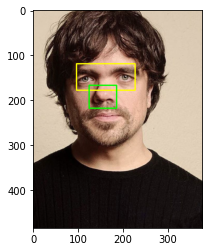

In [286]:
plt.imshow(cv2.cvtColor(eyes_nose,cv2.COLOR_BGR2RGB))

In [287]:
output=cv2.imread('Before.png')
output.shape

(485, 377, 3)

In [288]:
mustache.shape

(320, 640, 4)

In [307]:
noseOffset=35
x,y,w,h = nose_coor[0]
w=w+noseOffset
mustache=cv2.resize(mustache,(w,int(0.5*w)))

In [290]:
mustache.shape

(48, 96, 4)

In [296]:
eyesOffset=100
x,y,w,h = eyes_coor[0]
glasses=cv2.resize(glasses,(w+eyesOffset,int((eyesOffset+w)*221/483)))

In [297]:

opacity_m=mustache[:,:,3]
opacity_g=glasses[:,:,3]

In [298]:
print(glasses.shape)
print(mustache.shape)
opacity_g.mean()

(105, 230, 4)
(48, 96, 4)


68.20293995859213

In [299]:
x,y,w,h= eyes_coor[0]
yshift=20
for i in range (y-yshift,y-yshift+glasses.shape[0]):
    for j in range(x-eyesOffset//2,x-eyesOffset//2+glasses.shape[1]):
        if(opacity_g[i-y+yshift][j-x+eyesOffset//2]>0):
            output[i][j][0]=glasses[i-y+yshift][j-x+eyesOffset//2][0]
            output[i][j][1]=glasses[i-y+yshift][j-x+eyesOffset//2][1]
            output[i][j][2]=glasses[i-y+yshift][j-x+eyesOffset//2][2]
#output[y:y+glasses.shape[0],x+5:x+5+glasses.shape[1],0]=glasses[:,:,0]*opacity_g/255+output[y:y+glasses.shape[0],x+5:x+5+glasses.shape[1],0]*(255-opacity_g)/255

In [300]:
cv2.imshow("with glasses",output)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [308]:
x,y,w,h= nose_coor[0]
h=int(h/2)
x=x
for i in range (y+h,y+h+mustache.shape[0]):
    for j in range(x,x+mustache.shape[1]):
        if(opacity_m[i-y-h][j-x]>0):
            print(opacity_m[i-y-h][j-x])
            output[i][j][0]=mustache[i-y-h][j-x][0]
            output[i][j][1]=mustache[i-y-h][j-x][1]
            output[i][j][2]=mustache[i-y-h][j-x][2]

3
1
1
3
3
1
1
2
3
130
254
255
255
255
255
255
255
254
48
44
255
255
255
255
255
255
255
254
133
3
251
255
255
255
255
255
255
255
255
255
255
255
255
30
25
255
255
255
255
255
255
255
255
255
255
255
255
251
1
253
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
238
236
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
253
1
10
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
243
243
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
10
98
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
101
124
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
127
102
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255

In [312]:
cv2.imshow("Completed",output)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [310]:
_1=output[:,:,0].flatten()
_2=output[:,:,1].flatten()
_3=output[:,:,2].flatten()

In [311]:
file=open("Output.csv",mode='w')
file.write("Channel 1,Channel 2,Channel 3\n")
for i in range (len(_1)):
        file.write(str(_3[i])+","+str(_2[i])+","+str(_1[i])+"\n")
file.close()